In [1]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

from collections import defaultdict
from scipy.stats.stats import pearsonr

In [2]:
df=pd.read_csv("credit.csv")
df.head(5)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [3]:
df_srm=df.dropna(axis=0, how='all') #srm=senza righe mancanti;
df_srm.isnull().sum()
df_srm['Tax Liens'] = df_srm['Tax Liens'].fillna(df['Tax Liens'].mode()[0])
print(df_srm["Tax Liens"].describe())
df_srm['Bankruptcies'] = df_srm['Bankruptcies'].fillna(df['Bankruptcies'].mode()[0])
print(df_srm["Bankruptcies"].describe()) 
df_srm['Years in current job'] = df_srm['Years in current job'].fillna(df['Years in current job'].mode()[0])
print(df_srm["Years in current job"].describe())
df_srm['Maximum Open Credit'] = df_srm['Maximum Open Credit'].fillna(df['Maximum Open Credit'].mode()[0])
print(df_srm["Years in current job"].describe())
df_srm["Annual Income"]=df_srm["Annual Income"].fillna(df["Annual Income"].mean())
print(df_srm["Annual Income"].describe())
df_srm["Credit Score"]=df_srm["Credit Score"].fillna(df["Credit Score"].mean())
print(df_srm["Credit Score"].describe())

count    100000.00000
mean          0.02931
std           0.25817
min           0.00000
25%           0.00000
50%           0.00000
75%           0.00000
max          15.00000
Name: Tax Liens, dtype: float64
count    100000.000000
mean          0.117500
std           0.351105
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           7.000000
Name: Bankruptcies, dtype: float64
count        100000
unique           11
top       10+ years
freq          35343
Name: Years in current job, dtype: object
count        100000
unique           11
top       10+ years
freq          35343
Name: Years in current job, dtype: object
count    1.000000e+05
mean     1.378277e+06
std      9.722974e+05
min      7.662700e+04
25%      9.311805e+05
50%      1.369919e+06
75%      1.512704e+06
max      1.655574e+08
Name: Annual Income, dtype: float64
count    100000.000000
mean       1076.456089
std        1326.598950
min         585.000000
25%         711.000000
50

C:\Users\Gianmarco\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Gianmarco\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Gianmarco\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [4]:
df_srm.isnull().sum() #per essere sicuri che non ci siano missing

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                        0
Annual Income                       0
Years in current job                0
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    53141
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 0
Bankruptcies                        0
Tax Liens                           0
dtype: int64

In [5]:
df_clf=df_srm.copy() #nel nuovo dataset ho tolto gli ID e la colonna Months since last delinquent e tutte le variabili categoriche.
df_clf.drop(df_srm.columns[[0,1,4,7,8,9,12,13,14,17,18]], axis="columns",  inplace=True) 
df_clf.head()

,Loan Status,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Current Credit Balance,Maximum Open Credit
0,Fully Paid,445412.0,709.000000,1.167493e+06,5214.74,17.2,228190.0,416746.0
1,Fully Paid,262328.0,1076.456089,1.378277e+06,33295.98,21.1,229976.0,850784.0
2,Fully Paid,99999999.0,741.000000,2.231892e+06,29200.53,14.9,297996.0,750090.0
3,Fully Paid,347666.0,721.000000,8.069490e+05,8741.90,12.0,256329.0,386958.0
4,Fully Paid,176220.0,1076.456089,1.378277e+06,20639.70,6.1,253460.0,427174.0


In [6]:
nuovo_df=df_srm.copy() #nel nuovo dataset ho tolto gli ID e la colonna Months since last delinquent e tutte le variabili categoriche.
nuovo_df.drop(df_srm.columns[[0,1,2,4,7,8,9,12,13,14,17,18]], axis="columns",  inplace=True) 
nuovo_df.head()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Current Credit Balance,Maximum Open Credit
0,445412.0,709.000000,1.167493e+06,5214.74,17.2,228190.0,416746.0
1,262328.0,1076.456089,1.378277e+06,33295.98,21.1,229976.0,850784.0
2,99999999.0,741.000000,2.231892e+06,29200.53,14.9,297996.0,750090.0
3,347666.0,721.000000,8.069490e+05,8741.90,12.0,256329.0,386958.0
4,176220.0,1076.456089,1.378277e+06,20639.70,6.1,253460.0,427174.0


In [7]:
nuovo_df.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Current Credit Balance,Maximum Open Credit
count,1.000000e+05,100000.000000,1.000000e+05,100000.000000,100000.000000,1.000000e+05,1.000000e+05
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,2.946374e+05,7.607832e+05
std,3.178394e+07,1326.598950,9.722974e+05,12174.992609,7.015324,3.761709e+05,8.384420e+06
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000e+00,0.000000e+00
25%,1.796520e+05,711.000000,9.311805e+05,10214.162500,13.500000,1.126700e+05,2.734325e+05
50%,3.122460e+05,733.000000,1.369919e+06,16220.300000,16.900000,2.098170e+05,4.678740e+05
75%,5.249420e+05,750.000000,1.512704e+06,24012.057500,21.700000,3.679588e+05,7.829580e+05
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,3.287897e+07,1.539738e+09


In [8]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
df_out = nuovo_df[~((nuovo_df < (Q1 - 1.5 * IQR)) |(nuovo_df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)
df_out.isnull().sum()

Current Loan Amount             345290.000
Credit Score                        36.000
Annual Income                   801819.000
Monthly Debt                     13797.895
Years of Credit History              8.200
Months since last delinquent        35.000
Number of Open Accounts              6.000
Number of Credit Problems            0.000
Current Credit Balance          255288.750
Maximum Open Credit             509520.000
Bankruptcies                         0.000
Tax Liens                            0.000
dtype: float64
(53620, 7)


Current Loan Amount        0
Credit Score               0
Annual Income              0
Monthly Debt               0
Years of Credit History    0
Current Credit Balance     0
Maximum Open Credit        0
dtype: int64

In [9]:
Q1 = df_clf.quantile(0.25)
Q3 = df_clf.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
df_clf = df_clf[~((df_clf < (Q1 - 1.5 * IQR)) |(df_clf > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_clf.shape)
df_clf.isnull().sum()

Current Loan Amount        345290.000
Credit Score                   39.000
Annual Income              581523.500
Monthly Debt                13797.895
Years of Credit History         8.200
Current Credit Balance     255288.750
Maximum Open Credit        509525.500
dtype: float64
(51910, 8)


Loan Status                0
Current Loan Amount        0
Credit Score               0
Annual Income              0
Monthly Debt               0
Years of Credit History    0
Current Credit Balance     0
Maximum Open Credit        0
dtype: int64

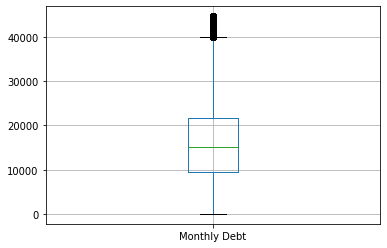

In [10]:
boxplot = df_out.boxplot(column=['Monthly Debt'])

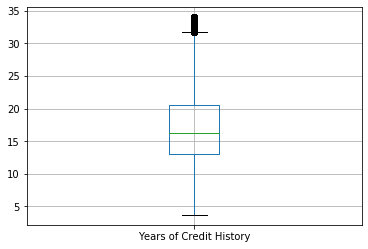

In [11]:
boxplot = df_out.boxplot(column=['Years of Credit History'])

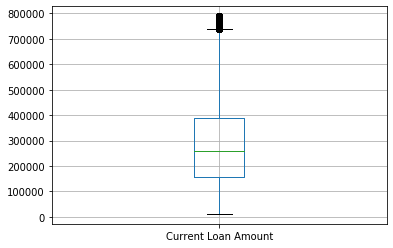

In [12]:
boxplot = df_out.boxplot(column=['Current Loan Amount'])

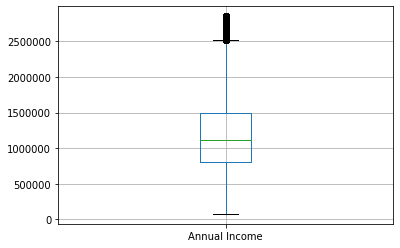

In [13]:
boxplot = df_out.boxplot(column=['Annual Income'])

# **Normalizzazzione degli attributi**

In [14]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler #carico il modulo ScandardScaler da sklearn.

In [15]:
scaler = MinMaxScaler()
X = scaler.fit_transform(df_out.values)

###### Elbow's method

In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

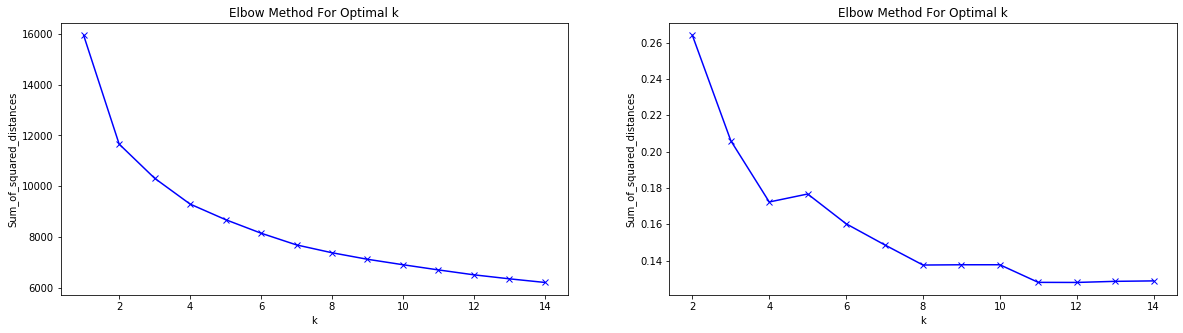

In [15]:
Sum_of_squared_distances = []
sill=[]
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)
    if k!=1:
        sill.append(silhouette_score(X,km.labels_))

f=plt.figure(figsize=(20,5))
f.add_subplot(1,2,1)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')

f.add_subplot(1,2,2)
plt.plot(K[1:], sill, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')


plt.show()

# K-Means

In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [17]:
kmeans = KMeans(n_clusters=2, init="k-means++", n_init=30, max_iter=100)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=2, n_init=30, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [42]:
kmeans.labels_[:5]

array([0, 0, 0, 1, 1])

In [43]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1]), array([33625, 19995], dtype=int64))

In [44]:
kmeans.cluster_centers_

array([[0.2531723 , 0.67955132, 0.32747211, 0.2750167 , 0.40195767,
        0.18831634, 0.216935  ],
       [0.52458041, 0.64926106, 0.52438803, 0.51229644, 0.50635794,
        0.49137951, 0.48087732]])

In [45]:
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(df_out, kmeans.labels_))

SSE 11657.564060793415
Silhouette 0.3053604255322605


###### Best epsilon

In [ ]:
#knee method prof

In [14]:
from scipy.spatial.distance import pdist, squareform

In [15]:
dist = pdist(X, 'euclidean') #pair wise distance
print (dist)
dist = squareform(dist) #distance matrix given the vector dist

[0.29070523 0.42515811 0.75681276 ... 0.36130241 0.89595059 0.73131255]


In [16]:
k = 14
kth_distances = list()
for d in dist:
    index_kth_distance = np.argsort(d)[k] 
    kth_distances.append(d[index_kth_distance])

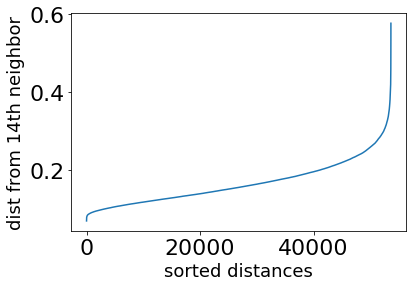

In [17]:
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from %sth neighbor' % k, fontsize=18)
plt.xlabel('sorted distances', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

In [ ]:
#knee method mio

In [ ]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
neigh = NearestNeighbors(n_neighbors=14)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

In [ ]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

# DBSCAN

In [16]:
from sklearn.cluster import DBSCAN  
dbscan = DBSCAN(eps=0.16, min_samples=42) 
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.16, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=42, n_jobs=None, p=None)

In [48]:
dbscan.labels_[:5]

array([-1,  0,  0, -1, -1], dtype=int64)

In [17]:
np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0], dtype=int64), array([24400, 29220], dtype=int64))

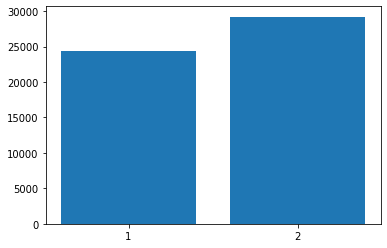

In [18]:
hist, bins = np.histogram(dbscan.labels_, 
                          bins=range(-1, len(set(dbscan.labels_)) ))
dict(zip(bins, hist))
x = np.linspace(1,2,2,endpoint=True)
plt.xticks(np.linspace(1,2
                       ,2,endpoint=True))
plt.bar(x,hist)
plt.show()

In [24]:
print('Silhouette %s' % silhouette_score(X, dbscan.labels_))

Silhouette 0.3069582284515338


###### Dimensionality reduction

In [19]:
rows2remove = np.random.choice(df_out.index, 20000 , replace=False)#37,3%

In [20]:
dff = df_out.drop(index=rows2remove, axis=0)
print(len(dff))

33620


In [21]:
scaler = MinMaxScaler()
Y = scaler.fit_transform(dff.values)

# Hierarchical Clustering

In [19]:
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

In [20]:
#ward method

In [21]:
data_dist = pdist(Y, metric='euclidean')
data_link1 = linkage(data_dist, method='ward', metric='euclidean')# ward's method

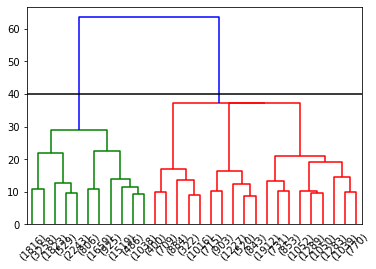

In [33]:
fig, ax = plt.subplots()

D_dendro = dendrogram(data_link1, ax=ax, color_threshold=40, truncate_mode='lastp')
threshold = 40 #for hline
ax.axhline(y=threshold, c='k')
plt.show()

In [23]:
#complete method

In [24]:
data_link2 = linkage(data_dist, method='complete', metric='euclidean')

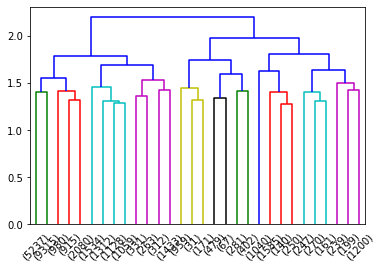

In [25]:
res = dendrogram(data_link2, color_threshold=None, truncate_mode='lastp')

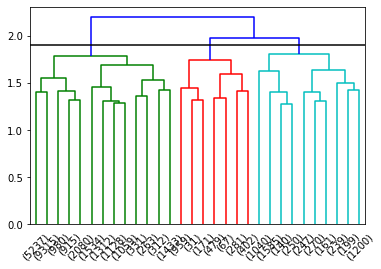

In [34]:
fig, ax = plt.subplots()

D_dendro = dendrogram(data_link2, ax=ax, color_threshold=1.9, truncate_mode='lastp')
threshold = 1.9 #for hline
ax.axhline(y=threshold, c='k')
plt.show()

In [27]:
# single method

In [28]:
data_link3 = linkage(data_dist, method='single', metric='euclidean')

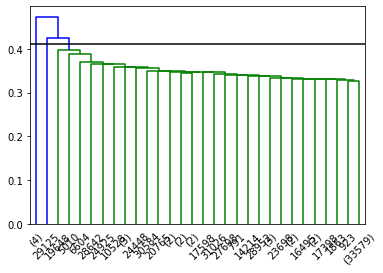

In [37]:
fig, ax = plt.subplots()

D_dendro = dendrogram(data_link3, ax=ax, color_threshold=0.41, truncate_mode='lastp')
threshold = 0.41
ax.axhline(y=threshold, c='k')
plt.show()

In [30]:
# Group average

In [31]:
data_link4 = linkage(data_dist, method='average', metric='euclidean')

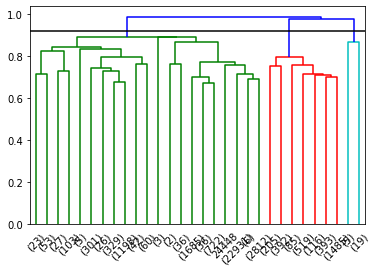

In [39]:
fig, ax = plt.subplots()

D_dendro = dendrogram(data_link4, ax=ax, color_threshold=0.92, truncate_mode='lastp')
threshold = 0.92 #for hline
ax.axhline(y=threshold, c='k')
plt.show()


# Clustering Analysis

In [ ]:
# HIERARCHICAL

In [20]:
from sklearn.cluster import AgglomerativeClustering

In [21]:
aggl =AgglomerativeClustering(linkage='ward', distance_threshold= 40, n_clusters = None)
aggl.fit(Y)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=40,
                        linkage='ward', memory=None, n_clusters=None)

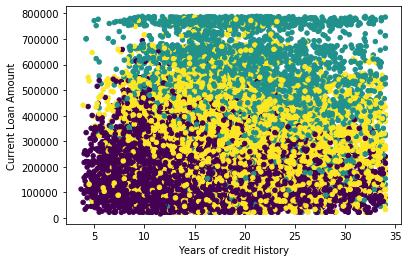

In [24]:
plt.scatter(dff['Years of Credit History'],dff['Current Loan Amount'] ,c=aggl.labels_, s=20)
plt.xlabel('Years of credit History')
plt.ylabel('Current Loan Amount')
plt.show()

In [25]:
np.unique(aggl.labels_, return_counts=True)

(array([0, 1, 2], dtype=int64), array([14363,  5894, 13363], dtype=int64))

In [ ]:
#K-MEANS

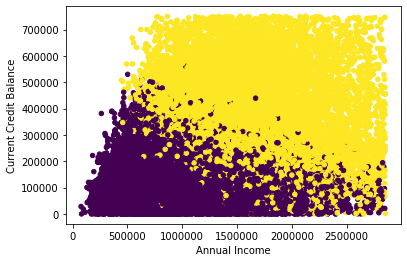

In [22]:
plt.scatter(df_out['Annual Income'],df_out['Current Credit Balance'] ,c=kmeans.labels_, s=20)
plt.xlabel('Annual Income')
plt.ylabel('Current Credit Balance')
plt.show()

In [ ]:
np.unique(kmeans.labels_, return_counts=True)

In [23]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)
centers

array([[2.08250141e+05, 7.18905996e+02, 9.86214475e+05, 1.22919373e+04,
        1.58758012e+01, 1.41101901e+05, 3.35049174e+05],
       [4.18958340e+05, 7.16012690e+02, 1.53125506e+06, 2.28688261e+04,
        1.90442818e+01, 3.68996875e+05, 7.44415333e+05]])

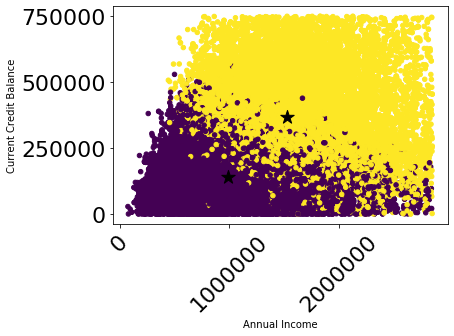

In [25]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)


plt.scatter(df_out['Annual Income'], df_out['Current Credit Balance'], c=kmeans.labels_, 
            s=20)
plt.xlabel('Annual Income')
plt.ylabel('Current Credit Balance')
plt.scatter(centers[:, 2], centers[:, 5], s=200, marker='*', c='k')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xticks(rotation= 45)

plt.show()

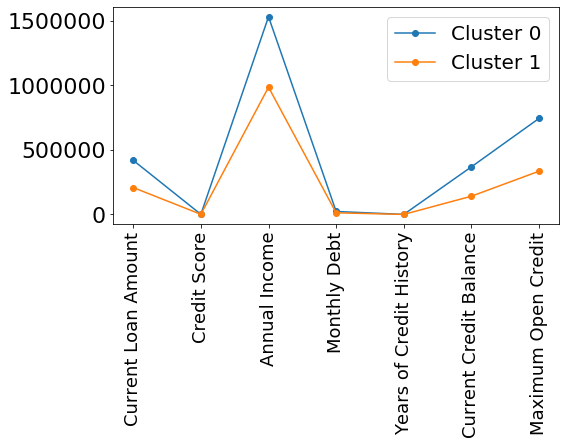

In [37]:
plt.figure(figsize=(8, 4))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xticks((range(0, len(df_out.columns))),df_out.columns, fontsize=18, rotation = 90)
plt.legend(fontsize=20)
plt.show()

In [ ]:
plt.figure(figsize=(8, 4))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xticks((range(0, 1)), fontsize=18)
plt.legend(fontsize=20)
plt.show()

In [ ]:
# DBSCAN

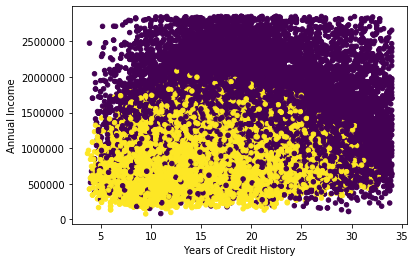

In [27]:
plt.scatter(df_out['Years of Credit History'],df_out['Annual Income'] ,c=dbscan.labels_, s=20)
plt.xlabel('Years of Credit History')
plt.ylabel('Annual Income')
plt.show()

In [ ]:
np.unique(dbscan.labels_, return_counts=True)

# CLASSIFICATION

In [48]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [54]:
label_encoders = dict()
column2encode = ['Loan Status']

for col in column2encode:
    le = LabelEncoder()
    df_clf[col] = le.fit_transform(df_clf[col])
    label_encoders[col] = le
    
df_clf.head()

,Loan Status,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Current Credit Balance,Maximum Open Credit
0,1,445412.0,709.0,1167493.0,5214.74,17.2,228190.0,416746.0
3,1,347666.0,721.0,806949.0,8741.90,12.0,256329.0,386958.0
6,1,217646.0,730.0,1184194.0,10855.08,19.6,122170.0,272052.0
9,1,215952.0,739.0,1454735.0,39277.75,13.9,669560.0,1021460.0
14,1,234124.0,727.0,693234.0,14211.24,24.7,28291.0,107052.0


In [59]:
attributes = [col for col in df_out.columns if col != 'Loan Status']
X = df_clf[attributes].values
y = df_clf['Loan Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [56]:
# Parameter Tuning

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,cross_val_score

In [61]:
hyper_params_space={'max_depth': np.arange(1, 10),'min_samples_split': np.arange(2, 5),'random_state': [0]}
tree= DecisionTreeClassifier()
search=GridSearchCV(tree,hyper_params_space)
search.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 

In [62]:
clf = search.best_estimator_
clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [63]:
for col, imp in zip(attributes, clf.feature_importances_):
    print(col, imp)

Current Loan Amount 0.0
Credit Score 0.0
Annual Income 1.0
Monthly Debt 0.0
Years of Credit History 0.0
Current Credit Balance 0.0
Maximum Open Credit 0.0


In [64]:
import pydotplus
from sklearn import tree
from IPython.display import Image

In [65]:
import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

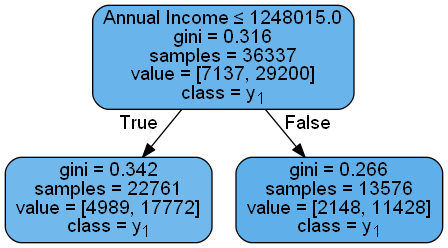

In [66]:
dot_data = tree.export_graphviz(clf, out_file=None,  
                                feature_names=attributes, 
                                class_names=True,  
                                filled=True, rounded=True,  
                                special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [67]:
y_pred = clf.predict(X_test)

In [68]:
scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: %0.4f (+/- %0.3f)' % (scores.mean(), scores.std()))

scores = cross_val_score(clf, X, y, cv=10, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.3f)' % (scores.mean(), scores.std()))

Accuracy: 0.8036 (+/- 0.000)
F1-score: 0.4456 (+/- 0.000)


In [69]:
def run_cross_validation_on_trees(X, y, tree_depths, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

In [70]:
sm_tree_depths = range(1,6)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_train, y_train, sm_tree_depths)

In [71]:
idx_max = sm_cv_scores_mean.argmax()
sm_best_tree_depth = sm_tree_depths[idx_max]
sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
print('The depth-{} tree achieves the best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      sm_best_tree_depth, round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))

The depth-1 tree achieves the best mean cross-validation accuracy 80.35886 +/- 0.00542% on training dataset


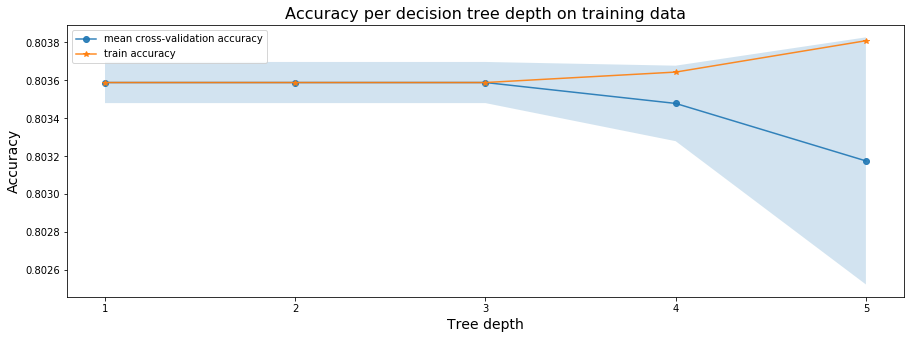

In [72]:
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')

In [73]:
# Accuracy del classificatore

In [74]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3058
           1       0.80      1.00      0.89     12515

    accuracy                           0.80     15573
   macro avg       0.40      0.50      0.45     15573
weighted avg       0.65      0.80      0.72     15573



C:\Users\Gianmarco\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [75]:
y_score=clf.predict_proba(X_test)
fpr0, tpr0, _ = roc_curve(y_test, y_score[:, 1])
roc_auc0 = auc(fpr0, tpr0)

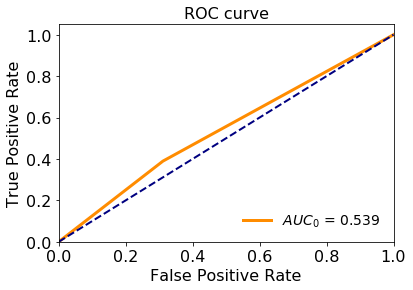

In [76]:
plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [77]:
import matplotlib.pyplot as plt
import scikitplot as skplt

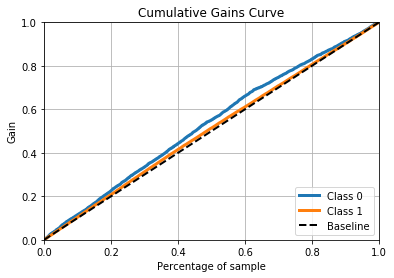

In [78]:
skplt.metrics.plot_cumulative_gain(y_test, y_score)

plt.show()